<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°02

## Objetivos del laboratorio

* Reforzar conceptos básicos de clasificación.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://www.xenonstack.com/wp-content/uploads/xenonstack-credit-card-fraud-detection.png" width="360" height="360" align="center"/>


El conjunto de datos se denomina `creditcard.csv` y consta de varias columnas con información acerca del fraude de tarjetas de crédito, en donde la columna **Class** corresponde a: 0 si no es un fraude y 1 si es un fraude.

En este ejercicio se trabajará el problemas de  clases desbalancedas. Veamos las primeras cinco filas dle conjunto de datos:

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [ ]:
# cargar datos
df = pd.read_csv(os.path.join("data","creditcard.csv"), sep=";")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
2,10.0,1.249999,-1.221637,0.383930,-1.234899,-1.485419,-0.753230,-0.689405,-0.227487,-2.094011,...,-0.231809,-0.483285,0.084668,0.392831,0.161135,-0.354990,0.026416,0.042422,121.50,0
3,10.0,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,...,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,9.99,0
4,12.0,1.103215,-0.040296,1.267332,1.289091,-0.735997,0.288069,-0.586057,0.189380,0.782333,...,-0.024612,0.196002,0.013802,0.103758,0.364298,-0.382261,0.092809,0.037051,12.99,0


Analicemos el total de fraudes respecto a los casos que nos son fraudes:


In [ ]:
# calcular proporciones
df_count = pd.DataFrame()
df_count["fraude"] =["no","si"]
df_count["total"] = df["Class"].value_counts() 
df_count["porcentaje"] = 100*df_count["total"] /df_count["total"] .sum()

df_count

,fraude,total,porcentaje
0,no,50000,99.025588
1,si,492,0.974412


Se observa que menos del 1% corresponde a registros frudulentos. La pregunta que surgen son:

* ¿ Cómo deben ser el conjunto de entrenamiento y de testeo?
* ¿ Qué modelos ocupar?
* ¿ Qué métricas ocupar?

Por ejemplo, analicemos el modelos de regresión logística y apliquemos el procedimiento estándar:

In [ ]:
# datos 
y = df.Class
X = df.drop('Class', axis=1)

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)


# Creando el modelo
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
 
# predecir
lr_pred = lr.predict(X_test)

# calcular accuracy
accuracy_score(y_test, lr_pred)

0.9961181969420898

En general el modelo tiene un **accuracy** del 99,9%, es decir, un podría suponer que el modelo predice casi perfectamente, pero eso esta lejos de ser así.  Para ver por qué es necesario seguir los siguientes pasos:

### 1. Cambiar la métrica de rendimiento

El primer paso es comparar con distintas métricas, para eso ocupemos las 4 métricas clásicas abordadas en el curso:
* accuracy
* precision
* recall
* f-score

En este punto deberá poner las métricas correspondientes y comentar sus resultados.

In [ ]:
# metrics
y_true = list(y_test)
y_pred = list(lr.predict(X_test))

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))

print('\nMetricas:\n ')
print('accuracy:   ',accuracy_score(y_test, lr_pred))
print('recall:     ',recall_score(y_test, lr_pred))
print('precision:  ',precision_score(y_test, lr_pred))
print('f-score:    ',f1_score(y_test, lr_pred))
print("")


Matriz de confusion:
 
[[12471    16]
 [   33   103]]

Metricas:
 
accuracy:    0.9961181969420898
recall:      0.7573529411764706
precision:   0.865546218487395
f-score:     0.807843137254902



Como nuestra variable predicha es binaria podemos aplicar el análisis ROC-AUC

In [ ]:
df['Class'].unique()

array([0, 1])

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(9,4))
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
probs=lr.predict_proba(X_test)
probs_tp = probs[:, 1]  #mantener probs solo de la clase positiva
auc = roc_auc_score(y_test, probs_tp)  # calcular score AUC 
print('AUC: %.2f' % auc)

AUC: 0.92


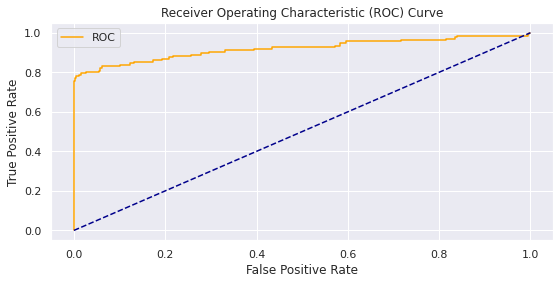

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, probs_tp) # obtener curva ROC
plot_roc_curve(fpr, tpr)

### 2. Cambiar algoritmo

El segundo paso es comparar con distintos modelos. Debe tener en cuenta que el modelo ocupaod resuelva el problema supervisado de clasificación.

En este punto deberá ajustar un modelo de **random forest**, aplicar las métricas y comparar con el modelo de regresión logística.

In [ ]:
# train model

rfc = RandomForestClassifier(max_depth=2,random_state=0) # algoritmo random forest
rfc = rfc.fit(X_train,y_train)


In [ ]:
# metrics

y_true = list(y_test)
y_pred = list(rfc.predict(X_test)) # predicciones con random forest


print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))

print('\nMetricas:\n ')
print('accuracy:   ',accuracy_score(y_true,y_pred))
print('recall:     ',recall_score(y_true,y_pred))
print('precision:  ',precision_score(y_true,y_pred))
print('f-score:    ',f1_score(y_true,y_pred))
print("")


Matriz de confusion:
 
[[12406    81]
 [   19   117]]

Metricas:
 
accuracy:    0.9920779529430405
recall:      0.8602941176470589
precision:   0.5909090909090909
f-score:     0.7005988023952097



Se aprecia que al utilizar el modelo RandomForest, liberando el input max_depth al valor por defecto, el modelo se ajusta muy bien pues el arbol se expande hasta que cada hoja es 'pura'. En todas las métricas observadas, el clasificador RandomForest tiene valores más cercanos al 1.

In [ ]:
probs=rfc.predict_proba(X_test)
probs_tp = probs[:, 1]  #mantener probs solo de la clase positiva
auc = roc_auc_score(y_test, probs_tp)  # calcular score AUC 
print('AUC: %.2f' % auc)

AUC: 0.96


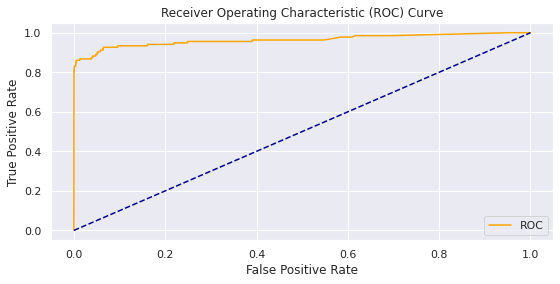

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, probs_tp) # obtener curva ROC
plot_roc_curve(fpr, tpr)

Del análisis AUC-ROC, se aprecia que el modelo RandomForest obtiene mejores resultados, sin embargo es debido a la profundidad libre del árbol. Al dejar esta opción por defecto, el ajuste toma alrededor de 20 seg, en comparación al ajuste por RegresiónLogistica que tarda menos de 1 seg.

### 3. Técnicas de remuestreo: sobremuestreo de clase minoritaria

El tercer paso es ocupar ténicas de remuestreo, pero sobre la clase minoritaria. Esto significa que mediantes ténicas de remuestreo trataremos de equiparar el número de elementos de la clase minoritaria a la clase mayoritaria.

In [ ]:
from sklearn.utils import resample

# concatenar el conjunto de entrenamiento
X = pd.concat([X_train, y_train], axis=1)

# separar las clases
not_fraud = X[X.Class==0]
fraud = X[X.Class==1]

# remuestrear  clase minoritaria
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# recombinar resultados
upsampled = pd.concat([not_fraud, fraud_upsampled])

# chequear el número de elementos por clases
upsampled.Class.value_counts()

1    37513
0    37513
Name: Class, dtype: int64

In [ ]:
# datos de entrenamiento sobre-balanceados
y_train = upsampled.Class
X_train = upsampled.drop('Class', axis=1)

Ocupando estos nuevos conjunto de entrenamientos, vuelva a aplicar el modelos de regresión logística y calcule las correspondientes métricas. Además, justifique las ventajas y desventjas de este procedimiento.

In [ ]:
upsampled = None # algoritmo de regresion logistica

# metrics

y_true = list(y_test)
y_pred = list(lr.predict(X_test))


print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))

print('\nMetricas:\n ')
print('accuracy:   ',accuracy_score(y_true,y_pred))
print('recall:     ',recall_score(y_true,y_pred))
print('precision:  ',precision_score(y_true,y_pred))
print('f-score:    ',f1_score(y_true,y_pred))
print("")


Matriz de confusion:
 
[[12471    16]
 [   33   103]]

Metricas:
 
accuracy:    0.9961181969420898
recall:      0.7573529411764706
precision:   0.865546218487395
f-score:     0.807843137254902



### 4. Técnicas de remuestreo - Ejemplo de clase mayoritaria

El cuarto paso es ocupar ténicas de remuestreo, pero sobre la clase mayoritaria. Esto significa que mediantes ténicas de remuestreo trataremos de equiparar el número de elementos de la clase mayoritaria  a la clase minoritaria.

In [ ]:
# remuestreo clase mayoritaria
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# recombinar resultados
downsampled = pd.concat([not_fraud_downsampled, fraud])

# chequear el número de elementos por clases
downsampled.Class.value_counts()

1    37513
0    37513
Name: Class, dtype: int64

In [ ]:
# datos de entrenamiento sub-balanceados

y_train = downsampled.Class
X_train = downsampled.drop('Class', axis=1)

Ocupando estos nuevos conjunto de entrenamientos, vuelva a aplicar el modelos de regresión logística y calcule las correspondientes métricas. Además, justifique las ventajas y desventjas de este procedimiento.

In [ ]:
undersampled = None # modelo de regresi+on logística

# metrics

y_true =  list(y_test)
y_pred = list(lr.predict(X_test))


print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))

print('\nMetricas:\n ')
print('accuracy:   ',accuracy_score(y_true,y_pred))
print('recall:     ',recall_score(y_true,y_pred))
print('precision:  ',precision_score(y_true,y_pred))
print('f-score:    ',f1_score(y_true,y_pred))
print("")


Matriz de confusion:
 
[[12471    16]
 [   33   103]]

Metricas:
 
accuracy:    0.9961181969420898
recall:      0.7573529411764706
precision:   0.865546218487395
f-score:     0.807843137254902



### 5. Conclusiones

Para finalizar el laboratorio, debe realizar un análisis comparativo con los disintos resultados obtenidos  en los pasos 1-4. Saque sus propias conclusiones del caso.